# Bias-Variance Trade-off

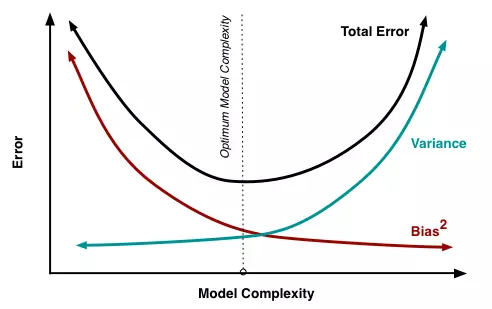

In [46]:
import pandas as pd

In [47]:
electricity = pd.read_excel("./input/Folds5x2_pp.xlsx")

In [48]:
electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB


In [49]:
electricity.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# PE是目标变量，其他是潜在特征

# 共9568个样本，按照80:20比例，分为训练集和验证集

# 这样，训练集：7654，验证集：1914

# 为了生成学习曲线，训练集的样本数从1开始，最后增大到7654.

## 方便起见，训练集大小取：【1， 100， 500， 2000， 5000， 7654】

## 每个特定大小的训练集都会训练出一个新的模型。

## 如果使用交叉验证，那么，每个训练集都会训练出k个不同模型。

# 使用sklearn中的learning_curve（）函数

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

In [51]:
features=['AT', 'V', 'AP', 'RH']
target='PE'
train_sizes=[1, 100, 500, 2000, 5000, 7654]

In [18]:


train_sizes, train_scores, validation_scores=learning_curve(estimator=LinearRegression(), 
                                                            X=electricity[features],
                                                            y=electricity[target],
                                                            train_sizes=train_sizes,
                                                            cv=5, 
                                                            scoring="neg_mean_squared_error", 
                                                            shuffle=True)

In [19]:
train_sizes

array([   1,  100,  500, 2000, 5000, 7654])

In [20]:
train_scores

array([[ -0.        ,  -0.        ,  -0.        ,  -0.        ,  -0.        ],
       [-16.15484425, -18.94942682, -23.92273638, -20.58081363,
        -16.63990257],
       [-18.09997963, -19.66855425, -19.46629674, -19.04043446,
        -20.69811754],
       [-19.26766365, -19.9504912 , -20.02425387, -20.44339168,
        -20.76871364],
       [-20.65788953, -20.21045668, -20.96054647, -20.33701859,
        -20.17986608],
       [-20.98565335, -20.63006094, -21.04384703, -20.63645316,
        -20.53034293]])

In [21]:
validation_scores

array([[-1048.39884504,  -329.87061118,  -351.2421441 ,  -335.53696654,
         -464.05084213],
       [  -21.92694129,   -21.34059808,   -21.67021148,   -22.30516808,
          -23.5615326 ],
       [  -20.16498542,   -21.3980985 ,   -19.99821343,   -21.69310655,
          -22.15061955],
       [  -19.89335666,   -21.34381813,   -19.74257317,   -21.31350802,
          -21.8405956 ],
       [  -19.91434428,   -21.34271116,   -19.72066874,   -21.30991696,
          -21.78075755],
       [  -19.9046791 ,   -21.33448781,   -19.67831137,   -21.31935354,
          -21.73737996]])

# 训练集有多少，就有多少行。
# 训练集被交叉验证分成多少份，就有多少列

# 对交叉验证误差求平均

In [22]:
# axis=0 沿着行的方向，就是每一列求平均
# axis=1 沿着列的方向，就是每一行求平均
train_scores_mean = - train_scores.mean(axis=1)
validation_scores_mean = - validation_scores.mean(axis=1)

In [23]:
train_scores_mean

array([ -0.        ,  19.24954473,  19.39467652,  20.09090281,
        20.46915547,  20.76527148])

In [24]:
validation_scores_mean

array([ 505.8198818 ,   22.1608903 ,   21.08100469,   20.82677031,
         20.81367974,   20.79484236])

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

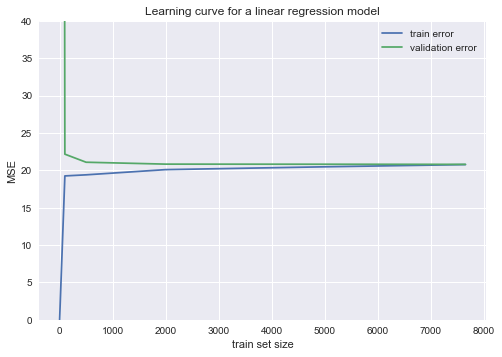

In [27]:
plt.style.use("seaborn")

plt.plot(train_sizes, train_scores_mean, label="train error")
plt.plot(train_sizes, validation_scores_mean, label="validation error")

plt.xlabel("train set size")
plt.ylabel("MSE")
plt.title("Learning curve for a linear regression model")
plt.legend()
plt.ylim(0, 40)
plt.show()

# 上述训练误差维持在20左右。要去判断这个20是高，还是低。

# 如果训练误差高，说明bias高。
# 如果训练误差低，说明bias低。

# 区分两个概念：

## 1.增加数据量
## 2. 增加数据特征

In [57]:
def learning_curves(estimator, data, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores=learning_curve(estimator=estimator, 
                                                            X=data[features],
                                                            y=data[target],
                                                            train_sizes=train_sizes,
                                                            cv=cv, 
                                                            scoring="neg_mean_squared_error", 
                                                            shuffle=True)
    train_scores_mean = - train_scores.mean(axis=1)
    validation_scores_mean = - validation_scores.mean(axis=1)
    plt.plot(train_sizes, train_scores_mean, label="train error")
    plt.plot(train_sizes, validation_scores_mean, label="validation error")

    plt.xlabel("train set size")
    plt.ylabel("MSE")
    plt.title("Learning curve for a "+str(estimator).split("(")[0]+" model")
    plt.legend()
    plt.ylim(0, 40)

In [58]:
from sklearn.ensemble import RandomForestRegressor

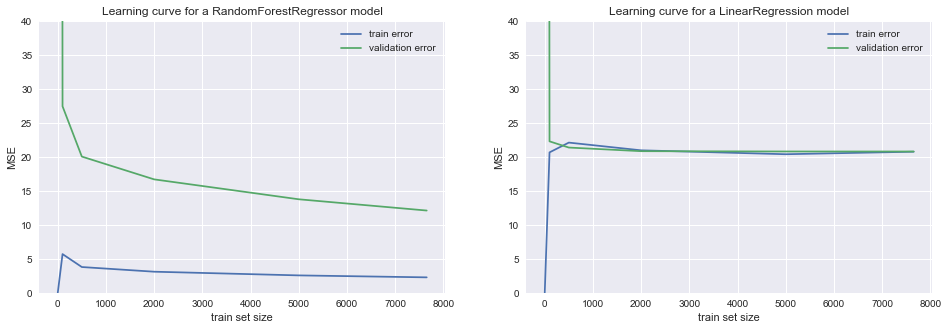

In [61]:
plt.figure(figsize=(16,5)) 
for model,i in [(RandomForestRegressor(), 1),(LinearRegression(), 2)]:    
    plt.subplot(1,2,i)
    learning_curves(model, electricity, features, target, train_sizes, 5)

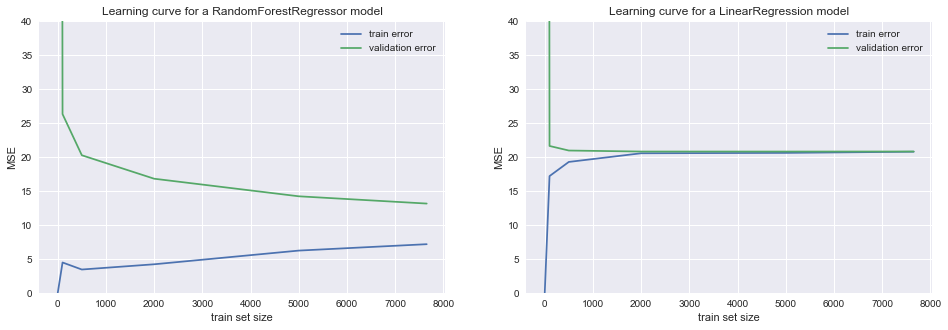

In [62]:
plt.figure(figsize=(16,5)) 
for model,i in [(RandomForestRegressor(max_leaf_nodes=350), 1),(LinearRegression(), 2)]:    
    plt.subplot(1,2,i)
    learning_curves(model, electricity, features, target, train_sizes, 5)